In [1]:
%%bash 
mkdir ~/.kaggle
cp kaggle.json ~/.kaggle/kaggle.json
chmod 600 ~/.kaggle/kaggle.json
pip install kaggle
kaggle datasets download -d andrewmvd/road-sign-detection
unzip road-sign-detection.zip -d data
mv ./data/annotations ./data/labels

road-sign-detection.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  road-sign-detection.zip
  inflating: data/annotations/road0.xml  
  inflating: data/annotations/road1.xml  
  inflating: data/annotations/road10.xml  
  inflating: data/annotations/road100.xml  
  inflating: data/annotations/road101.xml  
  inflating: data/annotations/road102.xml  
  inflating: data/annotations/road103.xml  
  inflating: data/annotations/road104.xml  
  inflating: data/annotations/road105.xml  
  inflating: data/annotations/road106.xml  
  inflating: data/annotations/road107.xml  
  inflating: data/annotations/road108.xml  
  inflating: data/annotations/road109.xml  
  inflating: data/annotations/road11.xml  
  inflating: data/annotations/road110.xml  
  inflating: data/annotations/road111.xml  
  inflating: data/annotations/road112.xml  
  inflating: data/annotations/road113.xml  
  inflating: data/annotations/road114.xml  
  inflating: data/annotations

In [2]:
%%bash
git clone https://github.com/ultralytics/yolov5
cd yolov5 
pip install -r requirements.txt

fatal: destination path 'yolov5' already exists and is not an empty directory.


  Obtaining dependency information for gitpython>=3.1.30 from https://files.pythonhosted.org/packages/8d/c4/82b858fb6483dfb5e338123c154d19c043305b01726a67d89532b8f8f01b/GitPython-3.1.40-py3-none-any.whl.metadata
  Using cached GitPython-3.1.40-py3-none-any.whl.metadata (12 kB)
  Obtaining dependency information for opencv-python>=4.1.1 from https://files.pythonhosted.org/packages/38/d2/3e8c13ffc37ca5ebc6f382b242b44acb43eb489042e1728407ac3904e72f/opencv_python-4.8.1.78-cp37-abi3-win_amd64.whl.metadata
  Using cached opencv_python-4.8.1.78-cp37-abi3-win_amd64.whl.metadata (20 kB)
  Using cached thop-0.1.1.post2209072238-py3-none-any.whl (15 kB)
  Obtaining dependency information for torch>=1.8.0 from https://files.pythonhosted.org/packages/74/07/edce54779f5c3fe8ab8390eafad3d7c8190fce68f922a254ea77f4a94a99/torch-2.1.0-cp311-cp311-win_amd64.whl.metadata
  Using cached torch-2.1.0-cp311-cp311-win_amd64.whl.metadata (25 kB)
  Obtaining dependency information for torchvision>=0.9.0 from https

In [48]:
#need to rename and separate functions
# from preprocessing import convert_voc_to_yolo
# convert_voc_to_yolo()

In [10]:
%%bash
cp yolov5/data/VOC.yaml yolov5/VOC.yaml

In [11]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2
import itertools
import os 

In [12]:
%%bash
cd yolov5 
python train.py --img 320 --batch 16 --epochs 10 --data VOC.yaml --weights yolov5s.pt --workers 2

train: weights=yolov5s.pt, cfg=, data=VOC.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=10, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 
YOLOv5  v7.0-240-g84ec8b5 Python-3.11.5 torch-2.1.0+cpu CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, translate=0.1, scal

In [2]:
import torch
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp5/weights/best.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\RYZEN/.cache\torch\hub\master.zip
YOLOv5  2023-11-14 Python-3.11.5 torch-2.1.0+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [ ]:
#Mean confidence for random images

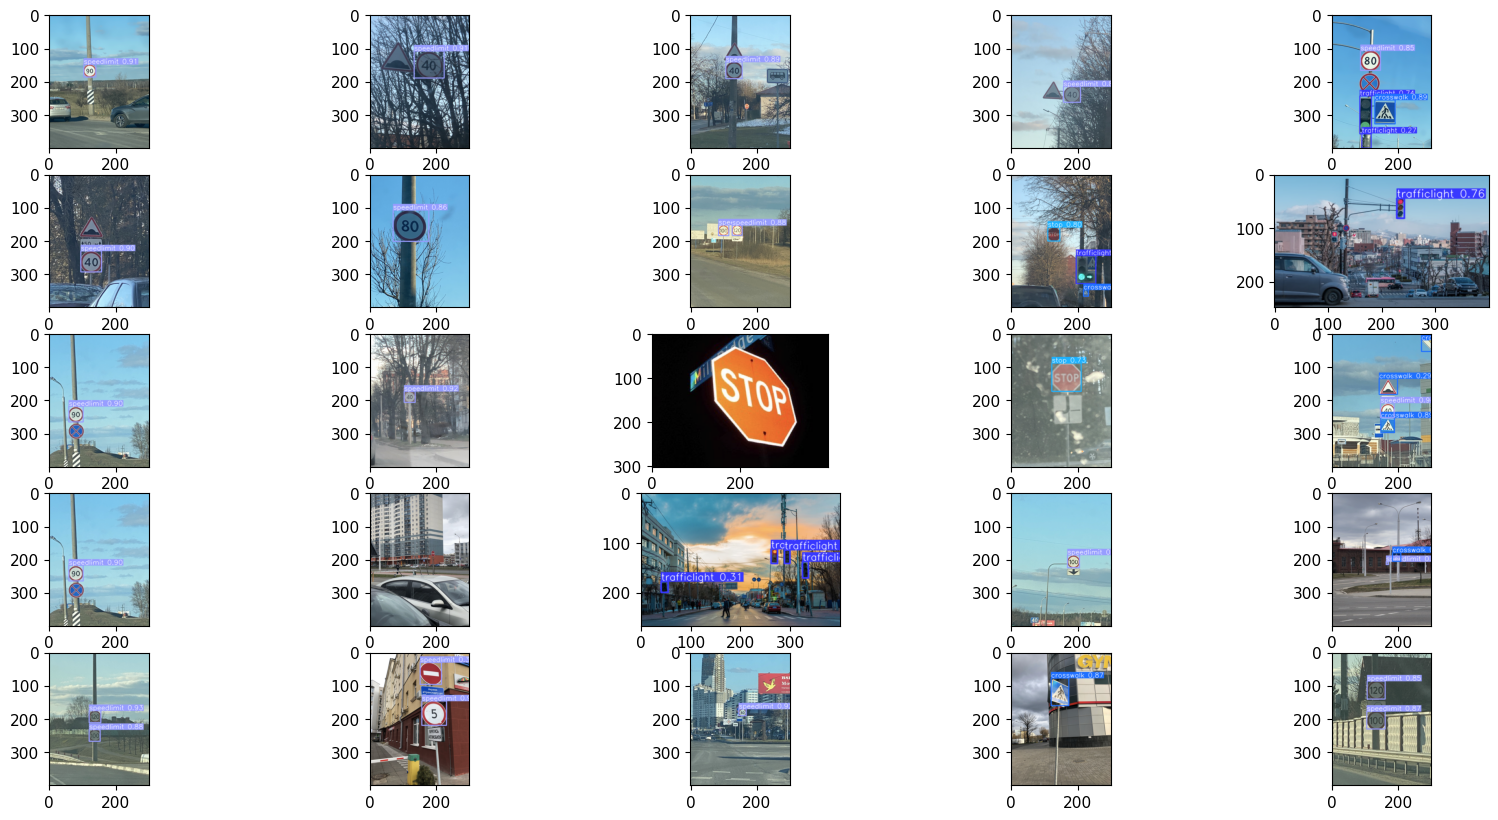

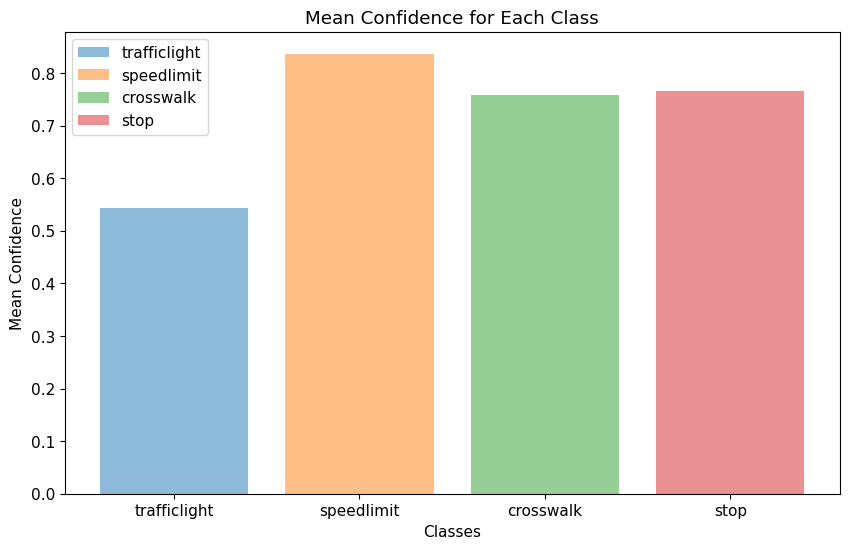

In [3]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2
import itertools
import os
import xml.etree.ElementTree as ET

def get_class_and_conf(det, class_names):
    conf = det[4].cpu().numpy()  # Confidence
    cls = int(det[5].cpu().numpy())  # Class

    if 0 <= cls < len(class_names):
        label = f"{class_names[cls]}: {conf:.2f}"
    else:
        label = f"Unknown Class {cls}: {conf:.2f}"

    return label

def plot_confidence(all_results, class_names):
    confidence_values = {cls: [] for cls in class_names}

    for results in all_results:
        for det in results.xyxy[0]:
            conf = det[4].cpu().numpy()
            cls = int(det[5].cpu().numpy())

            if class_names[cls] in confidence_values:
                confidence_values[class_names[cls]].append(conf)

    for cls in class_names:
        if cls not in confidence_values:
            confidence_values[cls] = [0]

    plt.figure(figsize=(10, 6))
    x_ticks = np.arange(len(class_names))
    average_confidence = []

    for i, cls in enumerate(class_names):
        conf_list = confidence_values[cls]

        if len(conf_list) > 0:
            plt.bar(i, np.mean(conf_list), alpha=0.5, label=cls)
            average_confidence.append(np.mean(conf_list))
        else:
            plt.bar(i, 0, alpha=0.5, label=cls)
            average_confidence.append(0)

    plt.xlabel('Classes')
    plt.ylabel('Mean Confidence')
    plt.title('Mean Confidence for Each Class')
    plt.xticks(x_ticks, class_names)
    plt.legend()
    plt.show()

class_names = ['trafficlight', 'speedlimit', 'crosswalk', 'stop']

%matplotlib inline
fig, ax = plt.subplots(5, 5, figsize=(20, 10))
imgs = os.listdir('./data/images')

all_results = []

for idx in itertools.product(range(5), range(5)):
    imgname = np.random.choice(imgs)
    img_path = f'./data/images/{imgname}'
    img = cv2.imread(img_path)
    results = model(img)
    ax[idx[0], idx[1]].imshow(cv2.cvtColor(np.squeeze(results.render()), cv2.COLOR_BGR2RGB))
    all_results.append(results)

plot_confidence(all_results, class_names)

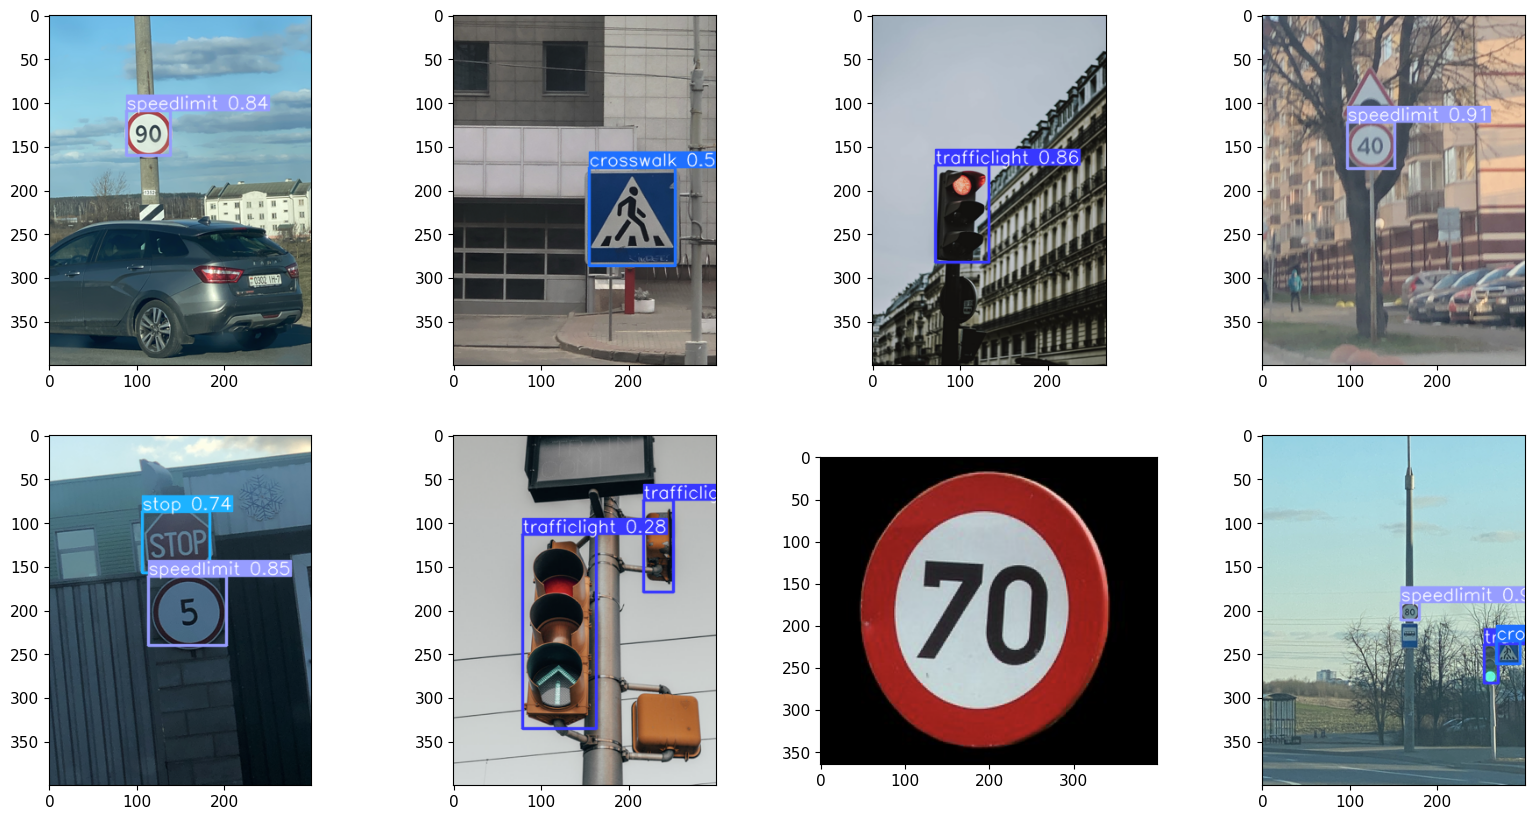

In [4]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2
import itertools
import os
import xml.etree.ElementTree as ET
%matplotlib inline
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
imgs = os.listdir('./data/images')
for idx in itertools.product(range(2), range(4)): 
    imgname = np.random.choice(imgs)
    img = cv2.imread(f'./data/images/{imgname}')
    results = model(img)
    ax[idx[0], idx[1]].imshow(cv2.cvtColor(np.squeeze(results.render()), cv2.COLOR_BGR2RGB))
    
plt.show()

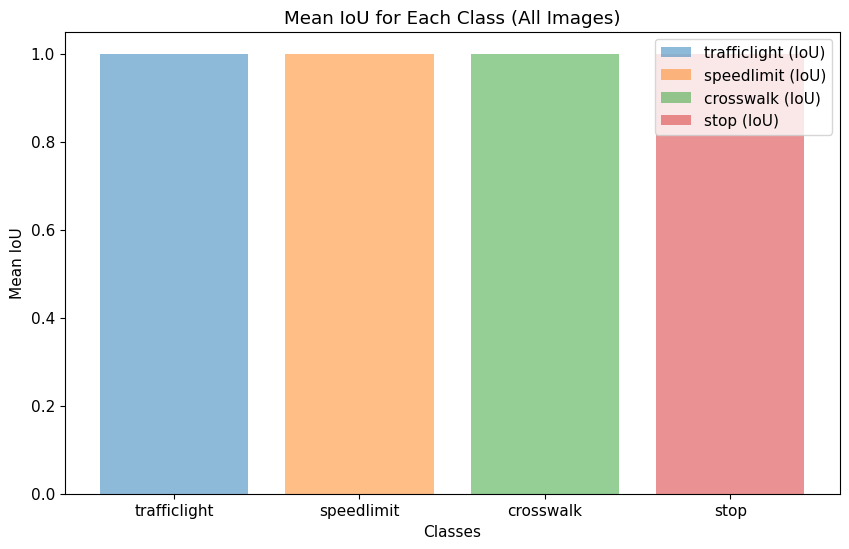

In [20]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2
import itertools
import os
import xml.etree.ElementTree as ET
from preprocessing import convert_voc_to_yolo
ground_truth_boxes_dict=convert_voc_to_yolo()
class_names = ['trafficlight', 'speedlimit', 'crosswalk', 'stop']
# Calculate IoU for all images
all_iou_values = {cls: [] for cls in class_names}
#print(ground_truth_boxes_dict['trafficlight'])

# def convert_yolo_to_absolute(size, box):
#     #print("called convert_yolo_to_absolute")
#     img_width, img_height = size
#     x, y, w, h = box
#     abs_box = [
#         int((x - w / 2) * img_width),
#         int((y - h / 2) * img_height),
#         int(w * img_width),
#         int(h * img_height),
#     ]
#     return abs_box

def convert_yolo_to_absolute(size, box):
    img_width, img_height = size
    x, y, w, h = box
    abs_box = [
        int((x - w / 2) * img_width),
        int((y - h / 2) * img_height),
        int(w * img_width),
        int(h * img_height),
    ]
    return abs_box

def calculate_iou(box1, box2):
    #print("called calculate_iou")
    x1, y1, w1, h1 = box1
    x2, y2, w2, h2 = box2

    intersection_x = max(0, min(x1 + w1, x2 + w2) - max(x1, x2))
    intersection_y = max(0, min(y1 + h1, y2 + h2) - max(y1, y2))

    intersection_area = intersection_x * intersection_y
    box1_area = w1 * h1
    box2_area = w2 * h2

    iou = intersection_area / float(box1_area + box2_area - intersection_area)
    return iou

for imgname in os.listdir('./data/images'):
    img_path = f'./data/images/{imgname}'
    gt_path = f'./data/labels/{imgname.replace(".png", ".txt")}'

    img = cv2.imread(img_path)
    results = model(img)

    with open(gt_path, 'r') as gt_file:
        gt_lines = gt_file.readlines()

    for line in gt_lines:
        values = line.strip().split()
        cls_id, x_center, y_center, box_width, box_height = map(float, values)
        cls_name = class_names[int(cls_id)]

        # Convert YOLO-format bounding box to absolute coordinates
        img_height, img_width, _ = img.shape
        #abs_box = convert_yolo_to_absolute((img_width, img_height), [x_center, y_center, box_width, box_height])

        ground_truth_boxes_dict[cls_name] = abs_box

    for det in results.xyxy[0]:
        conf = det[4].cpu().numpy()
        cls = int(det[5].cpu().numpy())
        #print(det[1:5].cpu().numpy())

        if class_names[cls] in all_iou_values and class_names[cls] in ground_truth_boxes_dict:
            # Find the corresponding ground truth box
            #print(class_names[cls])
            #print(ground_truth_boxes_dict[class_names[cls]])
            gt_box = ground_truth_boxes_dict[class_names[cls]]
            #print(class_names[cls])
            #print(gt_box)
            pred_box = det[1:5].cpu().numpy()
            #print(pred_box)

            # Calculate IoU
            iou = calculate_iou(pred_box, pred_box)
            all_iou_values[class_names[cls]].append(iou)

# Ensure all classes have at least one entry in all_iou_values
for cls in class_names:
    if cls not in all_iou_values:
        all_iou_values[cls] = [0]

# Display mean IoU for each class
plt.figure(figsize=(10, 6))
x_ticks = np.arange(len(class_names))
average_iou_all = []

for i, cls in enumerate(class_names):
    iou_list_all = all_iou_values[cls]

    if len(iou_list_all) > 0:
        plt.bar(i, np.mean(iou_list_all), alpha=0.5, label=f'{cls} (IoU)')
        average_iou_all.append(np.mean(iou_list_all))
    else:
        # Handle the case where there are no detections for the class
        plt.bar(i, 0, alpha=0.5, label=f'{cls} (IoU)')
        average_iou_all.append(0)

plt.xlabel('Classes')
plt.ylabel('Mean IoU')
plt.title('Mean IoU for Each Class (All Images)')
plt.xticks(x_ticks, class_names)
plt.legend()
plt.show()

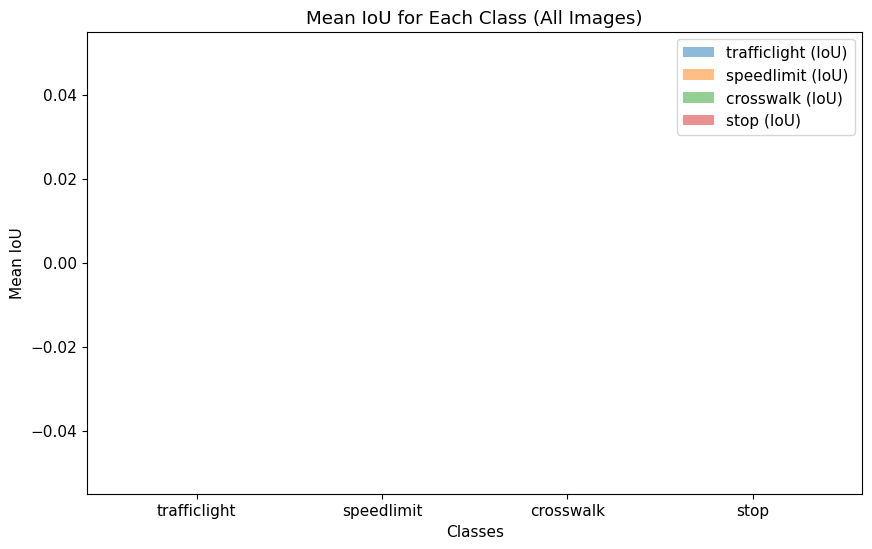

In [164]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2
import itertools
import os
import xml.etree.ElementTree as ET
from preprocessing import convert_voc_to_yolo
ground_truth_boxes_dict=convert_voc_to_yolo()
class_names = ['trafficlight', 'speedlimit', 'crosswalk', 'stop']
# Calculate IoU for all images
all_iou_values = {cls: [] for cls in class_names}

def convert_yolo_to_absolute(size, box):
    #print("called convert_yolo_to_absolute")
    img_width, img_height = size
    x, y, w, h = box
    abs_box = [
        int((x - w / 2) * img_width),
        int((y - h / 2) * img_height),
        int(w * img_width),
        int(h * img_height),
    ]
    return abs_box

def calculate_iou(box1, box2):
    #print("called calculate_iou")
    x1, y1, w1, h1 = box1
    x2, y2, w2, h2 = box2

    intersection_x = max(0, min(x1 + w1, x2 + w2) - max(x1, x2))
    intersection_y = max(0, min(y1 + h1, y2 + h2) - max(y1, y2))

    intersection_area = intersection_x * intersection_y
    box1_area = w1 * h1
    box2_area = w2 * h2

    iou = intersection_area / float(box1_area + box2_area - intersection_area)
    return iou

for imgname in os.listdir('./data/images'):
    img_path = f'./data/images/{imgname}'
    gt_path = f'./data/labels/{imgname.replace(".png", ".txt")}'

    img = cv2.imread(img_path)
    results = model(img)

    with open(gt_path, 'r') as gt_file:
        gt_lines = gt_file.readlines()

    for line in gt_lines:
        values = line.strip().split()
        cls_id, x_center, y_center, box_width, box_height = map(float, values)
        cls_name = class_names[int(cls_id)]

        # Convert YOLO-format bounding box to absolute coordinates
        img_height, img_width, _ = img.shape
        abs_box = convert_yolo_to_absolute((img_width, img_height), [x_center, y_center, box_width, box_height])

        if cls_name in ground_truth_boxes_dict:
            ground_truth_boxes_dict[cls_name][imgname] = abs_box

    for det in results.xyxy[0]:
        conf = det[4].cpu().numpy()
        cls = int(det[5].cpu().numpy())
        #print("here")
        if class_names[cls] in all_iou_values and class_names[cls] in ground_truth_boxes_dict:
            # Find the corresponding ground truth box
            gt_box = ground_truth_boxes_dict[class_names[cls]][imgname]
            pred_box = det[1:5].cpu().numpy()
            
            #print(gt_box)
            #print(pred_box)
            # Calculate IoU
            iou = calculate_iou(gt_box, pred_box)
            all_iou_values[class_names[cls]].append(iou)

# Ensure all classes have at least one entry in all_iou_values
for cls in class_names:
    if cls not in all_iou_values:
        all_iou_values[cls] = [0]

# Display mean IoU for each class
plt.figure(figsize=(10, 6))
x_ticks = np.arange(len(class_names))
average_iou_all = []

for i, cls in enumerate(class_names):
    iou_list_all = all_iou_values[cls]

    if len(iou_list_all) > 0:
        plt.bar(i, np.mean(iou_list_all), alpha=0.5, label=f'{cls} (IoU)')
        average_iou_all.append(np.mean(iou_list_all))
    else:
        # Handle the case where there are no detections for the class
        plt.bar(i, 0, alpha=0.5, label=f'{cls} (IoU)')
        average_iou_all.append(0)

plt.xlabel('Classes')
plt.ylabel('Mean IoU')
plt.title('Mean IoU for Each Class (All Images)')
plt.xticks(x_ticks, class_names)
plt.legend()
plt.show()

In [ ]:
#Test for mean IoU for hardcoded IoU data

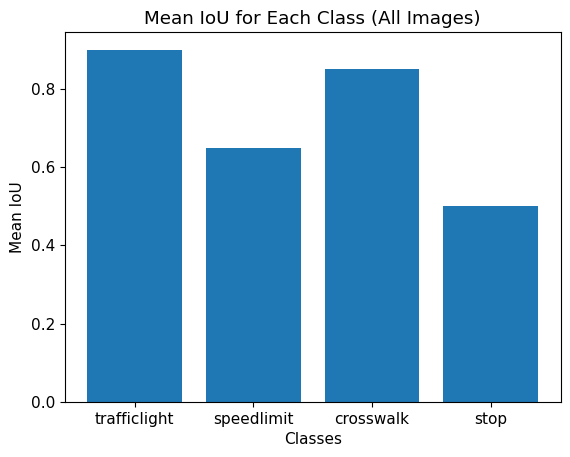

In [165]:
import matplotlib.pyplot as plt
import numpy as np

class_names = ['trafficlight', 'speedlimit', 'crosswalk', 'stop']
all_iou_values = {'trafficlight': [0.9, 0.9, 0.9], 'speedlimit': [0.6, 0.7], 'crosswalk': [0.9, 0.8], 'stop': [0.5]}

# Simplified bar chart
plt.bar(class_names, [np.mean(all_iou_values[cls]) for cls in class_names])
plt.xlabel('Classes')
plt.ylabel('Mean IoU')
plt.title('Mean IoU for Each Class (All Images)')
plt.show()

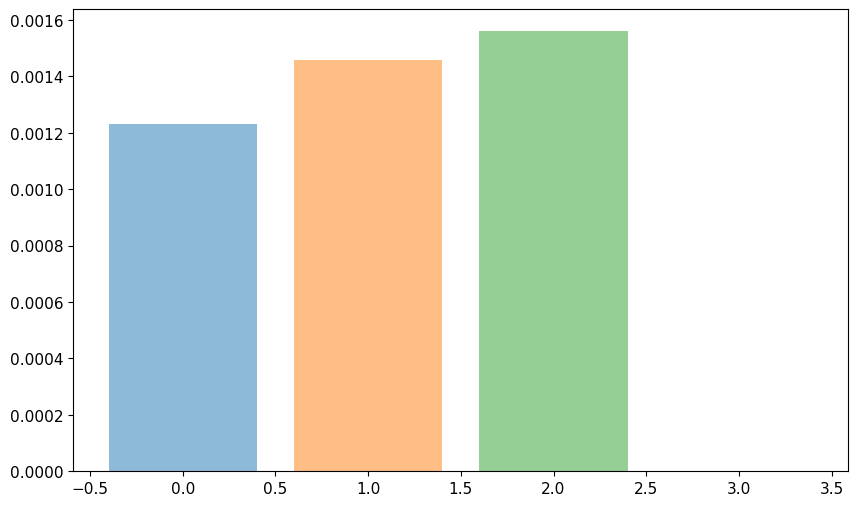

In [86]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2
import itertools
import os
import xml.etree.ElementTree as ET
from preprocessing import convert_voc_to_yolo

def convert_yolo_to_absolute(size, box):
    #print("called convert_yolo_to_absolute")
    img_width, img_height = size
    x, y, w, h = box
    abs_box = [
        int((x - w / 2) * img_width),
        int((y - h / 2) * img_height),
        int((x + w / 2) * img_width),
        int((y + h / 2) * img_height),
    ]
    return abs_box

def calculate_iou(box1, box2):
    #print("called calculate_iou")
    x1, y1, w1, h1 = box1
    x2, y2, w2, h2 = box2

    intersection_x = max(0, min(x1 + w1, x2 + w2) - max(x1, x2))
    intersection_y = max(0, min(y1 + h1, y2 + h2) - max(y1, y2))

    intersection_area = intersection_x * intersection_y
    box1_area = w1 * h1
    box2_area = w2 * h2

    iou = intersection_area / float(box1_area + box2_area - intersection_area)
    return iou


ground_truth_boxes_dict=convert_voc_to_yolo()
#print(ground_truth_boxes_dict)
class_names = ['trafficlight', 'speedlimit', 'crosswalk', 'stop']
# Calculate IoU for all images
all_iou_values = {cls: [] for cls in class_names}
#print(all_iou_values)

for imgname in os.listdir('./data/test'):
    img_path = f'./data/test/{imgname}'
    gt_path = f'./data/testlabels/{imgname.replace(".png", ".txt")}'

    img = cv2.imread(img_path)
    results = model(img)

    with open(gt_path, 'r') as gt_file:
        gt_lines = gt_file.readlines()

    #ground_truth_boxes_dict = {}

    for line in gt_lines:
        values = line.strip().split()
        cls_id, x_center, y_center, box_width, box_height = map(float, values)
        cls_name = class_names[int(cls_id)]

        # Convert YOLO-format bounding box to absolute coordinates
        img_height, img_width, _ = img.shape
        abs_box = convert_yolo_to_absolute((img_width, img_height), [x_center, y_center, box_width, box_height])

        ground_truth_boxes_dict[cls_name] = abs_box

    for det in results.xyxy[0]:
        conf = det[4].cpu().numpy()
        cls = int(det[5].cpu().numpy())

        if class_names[cls] in all_iou_values and class_names[cls] in ground_truth_boxes_dict:
            # Find the corresponding ground truth box
            gt_box = ground_truth_boxes_dict[class_names[cls]]
            pred_box = det[1:5].cpu().numpy()

            # Calculate IoU
            iou = calculate_iou(gt_box, pred_box)
            all_iou_values[class_names[cls]].append(iou)

# Ensure all classes have at least one entry in all_iou_values
for cls in class_names:
    if cls not in all_iou_values:
        all_iou_values[cls] = [0]

# Display mean IoU for each class
plt.figure(figsize=(10, 6))
x_ticks = np.arange(len(class_names))
average_iou_all = []

for i, cls in enumerate(class_names):
    iou_list_all = all_iou_values[cls]

    if len(iou_list_all) > 0:
        plt.bar(i, np.mean(iou_list_all), alpha=0.5, label=f'{cls} (IoU)')
        average_iou_all.append(np.mean(iou_list_all))
    else:
        # Handle the case where there are no detections for the class
        plt.bar(i, 0, alpha=0.5, label=f'{cls} (IoU)')
        average_iou_all.append(0)


In [23]:
import torch
from matplotlib import pyplot as plt
import matplotlib.patches as patches
import numpy as np
import cv2
import itertools
import os
import xml.etree.ElementTree as ET
from preprocessing import convert_voc_to_yolo
ground_truth_boxes_dict=convert_voc_to_yolo()

# Your dictionary
bounding_boxes_dict = {
    'road0': {'trafficlight': (0.5692883895131087, 0.365, 0.41198501872659177, 0.425)}
}

# Function to plot bounding boxes
def plot_boxes(image_path, bounding_boxes):
    # Load the image
    image = plt.imread(image_path)

    # Get image dimensions
    img_height, img_width, _ = image.shape

    # Create figure and axes
    fig, ax = plt.subplots(1)

    # Display the image
    ax.imshow(image)

    # Plot bounding boxes
    for label, bbox in bounding_boxes.items():
        x, y, w, h = bbox
        x = (x * img_width) - (w*img_width)/2
        y = (y * img_height) - (h*img_height)/2
        w = w * img_width
        h = h * img_height

        rect = patches.Rectangle(
            (x, y), w, h, linewidth=1, edgecolor='r', facecolor='none', label=label
        )
        ax.add_patch(rect)

    # Show plot
    plt.show()

# Example usage
image_path = './data/test/road0.png'
plot_boxes(image_path, bounding_boxes_dict['road0'])


In [ ]:
#Ground Truth bounding box test

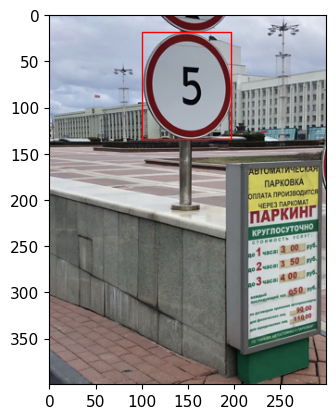

In [166]:
import torch
from matplotlib import pyplot as plt
import matplotlib.patches as patches
import numpy as np
import cv2
import itertools
import os
import xml.etree.ElementTree as ET
from preprocessing import convert_voc_to_yolo
ground_truth_boxes_dict=convert_voc_to_yolo()
#print(ground_truth_boxes_dict)


# Your dictionary
bounding_boxes_dict = {
    'road177': {'speedlimit': (0.49333333333333335, 0.19, 0.32, 0.29)}
}

# Function to plot bounding boxes
def plot_boxes(image_path, bounding_boxes):
    # Load the image
    image = plt.imread(image_path)

    # Get image dimensions
    img_height, img_width, _ = image.shape

    # Create figure and axes
    fig, ax = plt.subplots(1)

    # Display the image
    ax.imshow(image)

    # Plot bounding boxes
    for label, bbox in bounding_boxes.items():
        a=img_height/2
        b=img_width/2
        x, y, w, h = bbox
        x = (x - w / 2) * img_width
        y = (y - h / 2) * img_height
        w = w * img_width
        h = h * img_height
        rect = patches.Rectangle(
            (x, y), w, h, linewidth=1, edgecolor='r', facecolor='none', label=label
        )
        ax.add_patch(rect)

    # Show plot
    plt.show()

# Example usage
image_path = './data/test/road177.png'
plot_boxes(image_path, bounding_boxes_dict['road177'])

In [13]:
#Print all ground_truth boxes for a small sample of images

In [ ]:
import torch
model2 = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp5/weights/best.pt', force_reload=True)

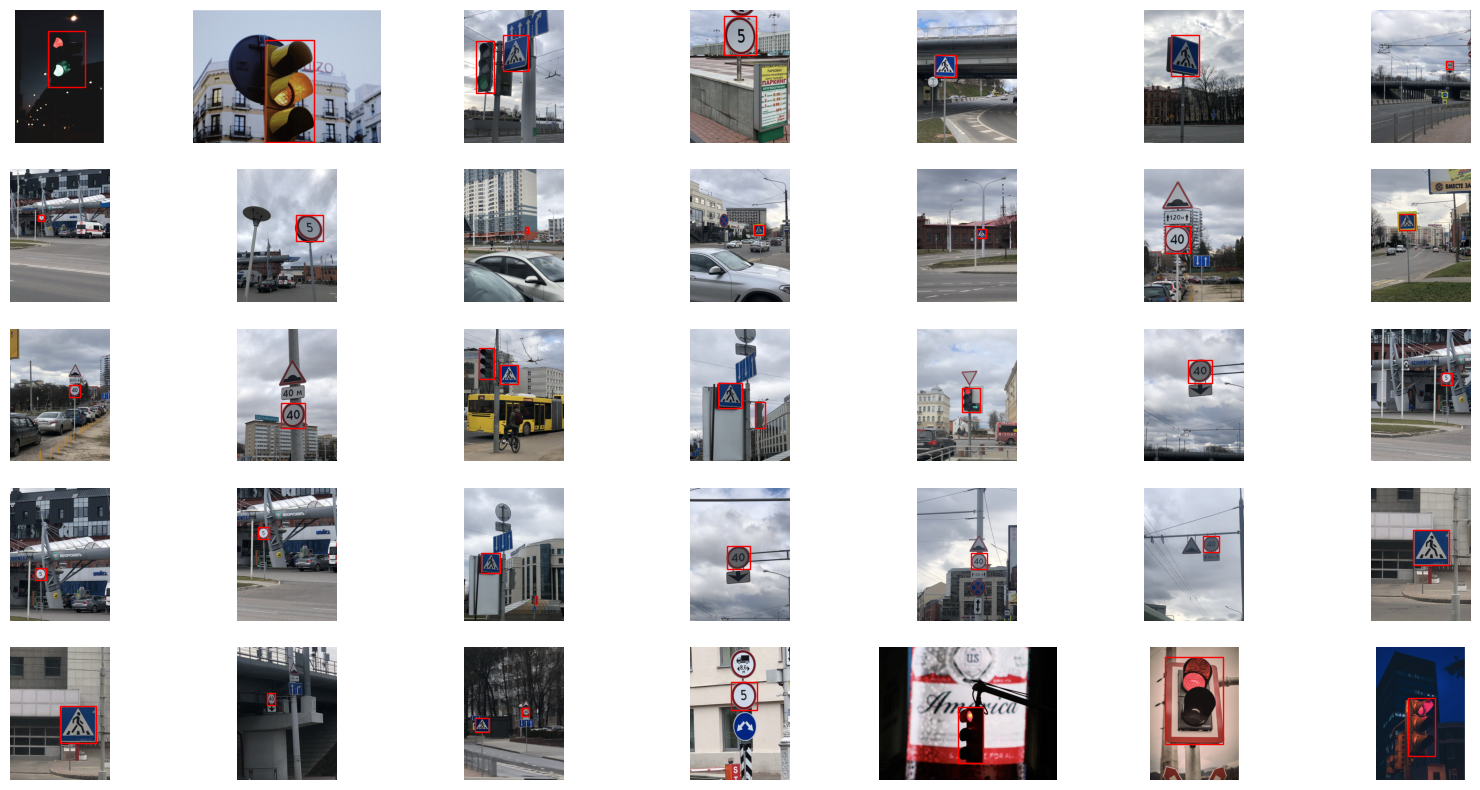

In [7]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2
import os
from preprocessing import convert_voc_to_yolo
import matplotlib.patches as patches

ground_truth_boxes_dict = convert_voc_to_yolo()
class_names = ['trafficlight', 'speedlimit', 'crosswalk', 'stop']

fig, ax = plt.subplots(5, 7, figsize=(20, 10))

for idx, imgname in enumerate(os.listdir('./data/test')):
    img_path = f'./data/test/{imgname}'
    gt_path = f'./data/testlabels/{imgname.replace(".png", ".txt")}'

    img = plt.imread(img_path)

    img_height, img_width, _ = img.shape

    gt_box = ground_truth_boxes_dict[imgname.replace(".png", "")]
    for label, bbox in gt_box.items():
        x, y, w, h = bbox
        x = x * img_width
        y = y * img_height
        w = w * img_width
        h = h * img_height

        rect = patches.Rectangle(
            (x, y), w, h, linewidth=1, edgecolor='r', facecolor='none', label=label
        )
        ax[idx // 7, idx % 7].add_patch(rect)

    ax[idx // 7, idx % 7].imshow(img)
    ax[idx // 7, idx % 7].axis('off')

plt.show()

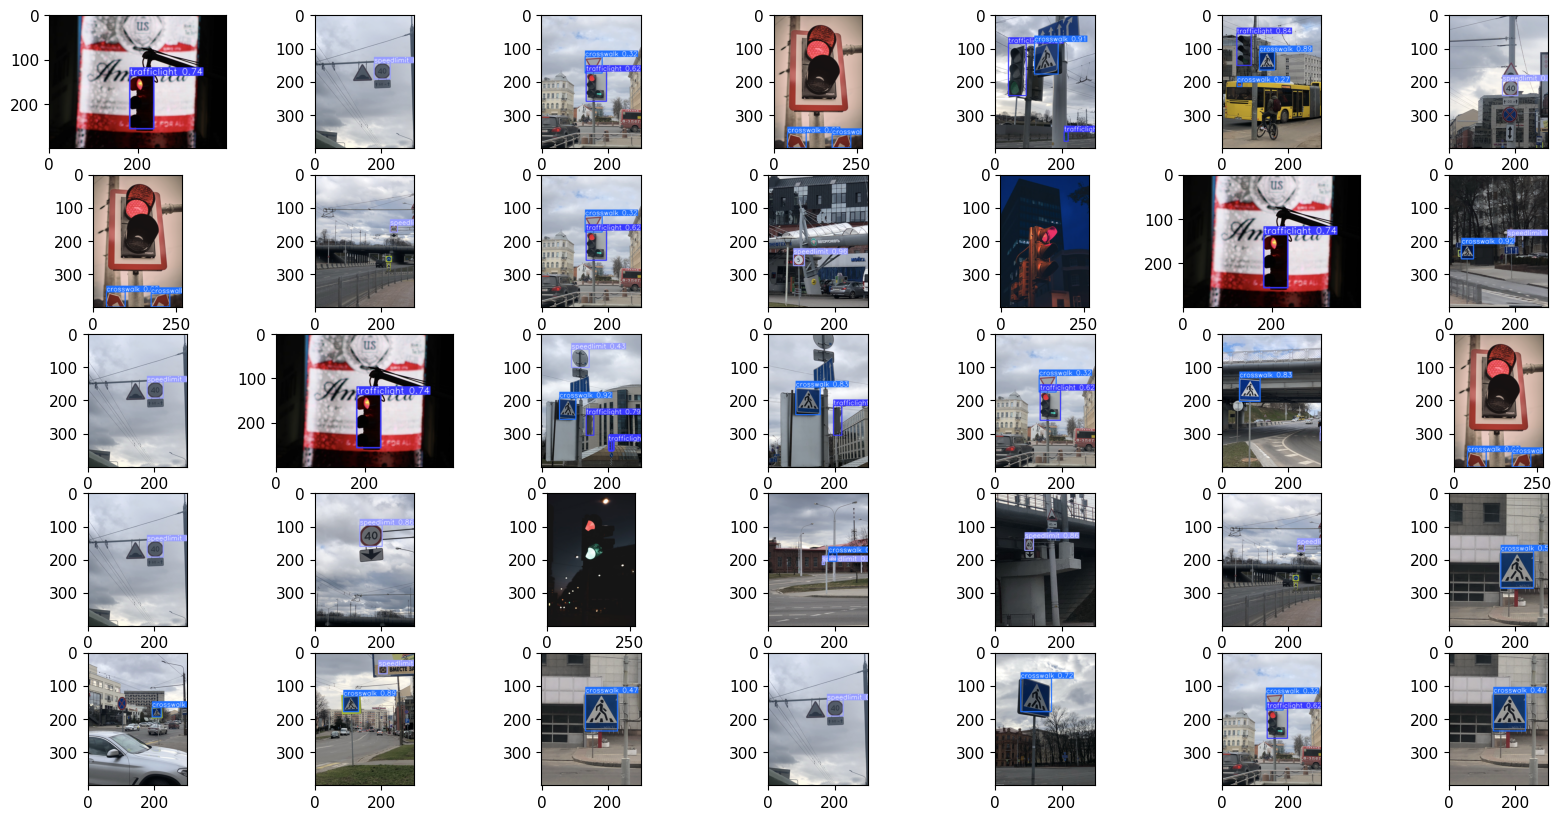

In [8]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2
import itertools
import os
import xml.etree.ElementTree as ET
%matplotlib inline
fig, ax = plt.subplots(5, 7, figsize=(20, 10))
imgs = os.listdir('./data/test')
for idx in itertools.product(range(5), range(7)): 
    imgname = np.random.choice(imgs)
    img = cv2.imread(f'./data/test/{imgname}')
    results = model(img)
    ax[idx[0], idx[1]].imshow(cv2.cvtColor(np.squeeze(results.render()), cv2.COLOR_BGR2RGB))
    
plt.show()

[     65.434       132.1      154.28     0.80618]
[     80.175      189.76      177.87     0.91397]
[     85.244      93.746       242.2     0.39202]
[     351.52       219.2       379.6     0.33118]
[     24.851      199.76      125.76     0.87855]
[       1.71      191.09      20.642     0.48605]
[     131.87      114.43      202.73     0.83348]
[     296.17      299.17      320.72     0.52616]
[     79.021      169.27      179.93     0.71942]
[     154.11      247.14      174.97     0.86667]
[     136.48      102.64       153.8     0.81975]
[     137.98      258.04         214     0.89171]
[     109.69      96.919      155.56     0.26563]
[     166.48      219.93      195.58     0.83923]
[     179.33      206.36      205.59     0.91074]
[     206.86      169.59      215.99     0.25484]
[     170.53      138.82      249.53     0.93178]
[     24.629      145.17      124.98     0.33067]
[     132.68      130.68      179.78     0.88517]
[      42.33      216.73      65.248     0.32481]


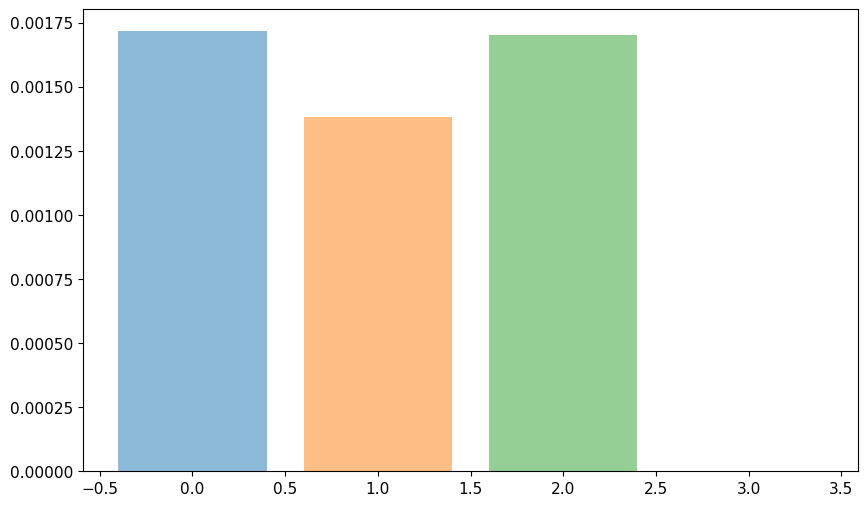

In [21]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2
import itertools
import os
import xml.etree.ElementTree as ET
from preprocessing import convert_voc_to_yolo

# def convert_yolo_to_absolute(size, box):
#     #print("called convert_yolo_to_absolute")
#     img_width, img_height = size
#     x, y, w, h = box
#     abs_box = [
#         int((x - w / 2) * img_width),
#         int((y - h / 2) * img_height),
#         int((x + w / 2) * img_width),
#         int((y + h / 2) * img_height),
#     ]
#     return abs_box

def calculate_iou(box1, box2):
    #print("called calculate_iou")
    x1, y1, w1, h1 = box1
    x2, y2, w2, h2 = box2

    intersection_x = max(0, min(x1 + w1, x2 + w2) - max(x1, x2))
    intersection_y = max(0, min(y1 + h1, y2 + h2) - max(y1, y2))

    intersection_area = intersection_x * intersection_y
    box1_area = w1 * h1
    box2_area = w2 * h2

    iou = intersection_area / float(box1_area + box2_area - intersection_area)
    return iou


ground_truth_boxes_dict=convert_voc_to_yolo()
#print(ground_truth_boxes_dict)
class_names = ['trafficlight', 'speedlimit', 'crosswalk', 'stop']
# Calculate IoU for all images
all_iou_values = {cls: [] for cls in class_names}
#print(all_iou_values)

for imgname in os.listdir('./data/test'):
    img_path = f'./data/test/{imgname}'
    gt_path = f'./data/testlabels/{imgname.replace(".png", ".txt")}'

    img = cv2.imread(img_path)
    results = model(img)

    with open(gt_path, 'r') as gt_file:
        gt_lines = gt_file.readlines()

    #ground_truth_boxes_dict = {}

    for line in gt_lines:
        values = line.strip().split()
        cls_id, x_center, y_center, box_width, box_height = map(float, values)
        cls_name = class_names[int(cls_id)]

        img_height, img_width, _ = img.shape
        abs_box = convert_yolo_to_absolute((img_width, img_height), [x_center, y_center, box_width, box_height])

        ground_truth_boxes_dict[cls_name] = abs_box

    for det in results.xyxy[0]:
        conf = det[4].cpu().numpy()
        cls = int(det[5].cpu().numpy())

        if class_names[cls] in all_iou_values and class_names[cls] in ground_truth_boxes_dict:
            gt_box = ground_truth_boxes_dict[class_names[cls]]
            print(pred_box)
            pred_box = det[1:5].cpu().numpy()

            iou = calculate_iou(gt_box, pred_box)
            all_iou_values[class_names[cls]].append(iou)

for cls in class_names:
    if cls not in all_iou_values:
        all_iou_values[cls] = [0]

plt.figure(figsize=(10, 6))
x_ticks = np.arange(len(class_names))
average_iou_all = []

for i, cls in enumerate(class_names):
    iou_list_all = all_iou_values[cls]

    if len(iou_list_all) > 0:
        plt.bar(i, np.mean(iou_list_all), alpha=0.5, label=f'{cls} (IoU)')
        average_iou_all.append(np.mean(iou_list_all))
    else
        plt.bar(i, 0, alpha=0.5, label=f'{cls} (IoU)')
        average_iou_all.append(0)


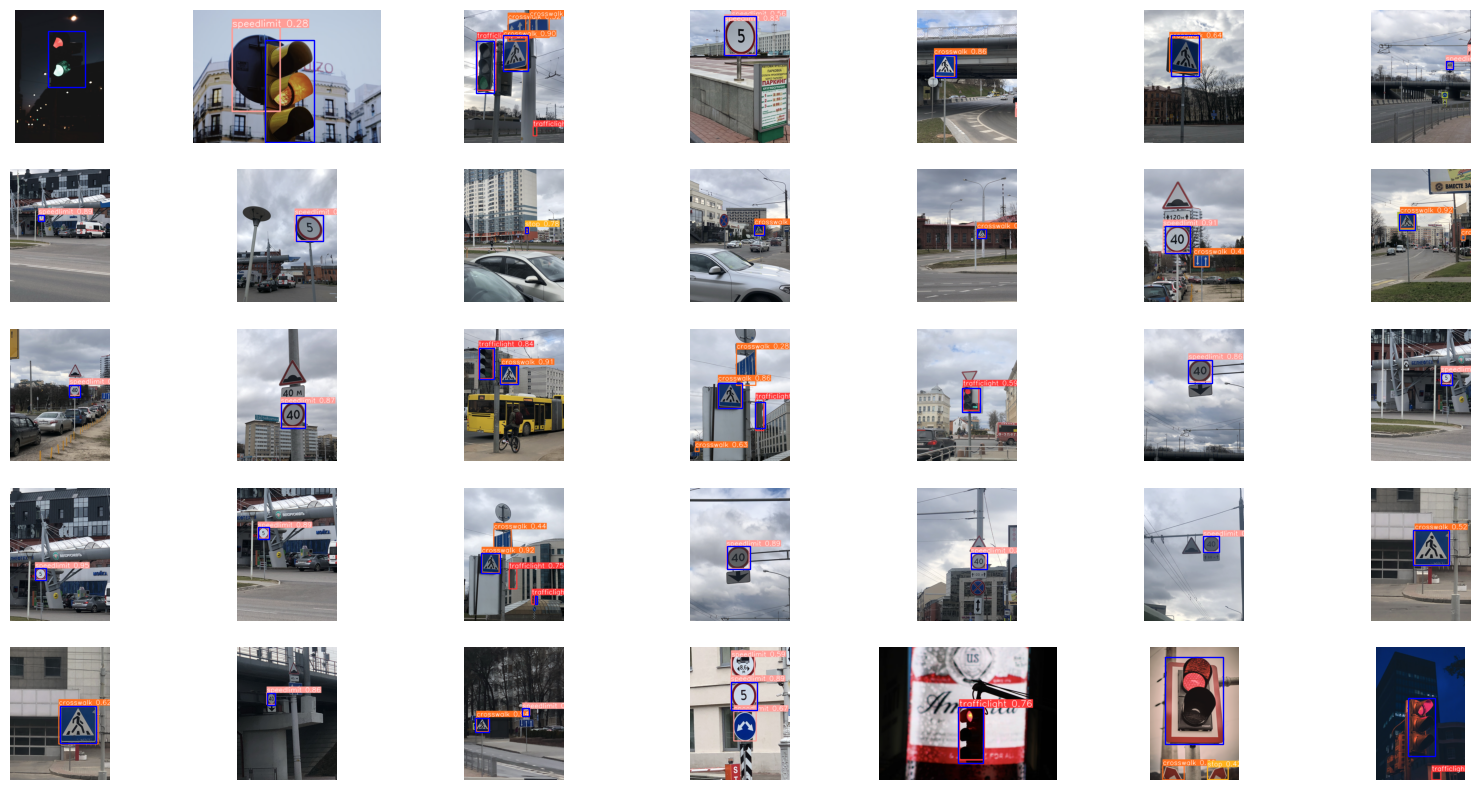

In [9]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2
import os
import matplotlib.patches as patches

from preprocessing import convert_voc_to_yolo

ground_truth_boxes_dict = convert_voc_to_yolo()
class_names = ['trafficlight', 'speedlimit', 'crosswalk', 'stop']

all_iou_values = {cls: [] for cls in class_names}

fig, ax = plt.subplots(5, 7, figsize=(20, 10))

all_results = []

for idx, imgname in enumerate(os.listdir('./data/test')):
    img_path = f'./data/test/{imgname}'
    gt_path = f'./data/testlabels/{imgname.replace(".png", ".txt")}'

    img = cv2.imread(img_path)
    img_bgr = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    results = model(img_bgr)

    img_height, img_width, _ = img_bgr.shape

    gt_box = ground_truth_boxes_dict[imgname.replace(".png", "")]
    for label, bbox in gt_box.items():
        x, y, w, h = bbox
        x = x * img_width
        y = y * img_height
        w = w * img_width
        h = h * img_height
        rect = patches.Rectangle(
            (x, y), w, h, linewidth=1, edgecolor='b', facecolor='none'
        )
        ax[idx // 7, idx % 7].add_patch(rect)
    for det in results.xyxy[0]:
        box = det[1:5].cpu().numpy()
        conf = det[4].cpu().numpy()
        cls = int(det[5].cpu().numpy())
        ax[idx // 7, idx % 7].imshow(cv2.cvtColor(np.squeeze(results.render()), cv2.COLOR_RGB2BGR))

    ax[idx // 7, idx % 7].imshow(img_bgr)
    ax[idx // 7, idx % 7].axis('off')

plt.show()


In [49]:
#IoU mean for each Class

trafficlight: [0.0, 0.7889678105965188, 0.8875815339648269, 0.6787031598064178, 0.8191776594965571, 0.0, 0.0, 0.6532377414352603, 0.8912960363302971, 0.0]
speedlimit: [0.9127280637923476, 0.0012472264526549733, 0.8308744935629447, 0.0, 0.9597011298859184, 0.9269003508146746, 0.9113101662915756, 0.8970191097121931, 0.8893046428042884, 0.9032835036725264, 0.9400896785041389, 0.8788383841931537, 0.7934938365025775, 0.9201720435484722, 0.9274235161929233, 0.9595727104715758, 0.9306928302659537, 0.8343094882640975, 0.9351211663521573, 0.0, 0.0]
crosswalk: [0.8496140501376188, 0.0, 0.08760162702297378, 0.9289609730943172, 0.7740553912526471, 0.9065894428700062, 0.8343844595485812, 0.871605237443956, 0.0, 0.8444593731114088, 0.9152189613082627, 0.0, 0.013787851201222648, 0.8916058171434782, 0.006096932366283999, 0.9258504909535277, 0.8797859809619132, 0.7862466505491191]
stop: [0.7735914971977847]


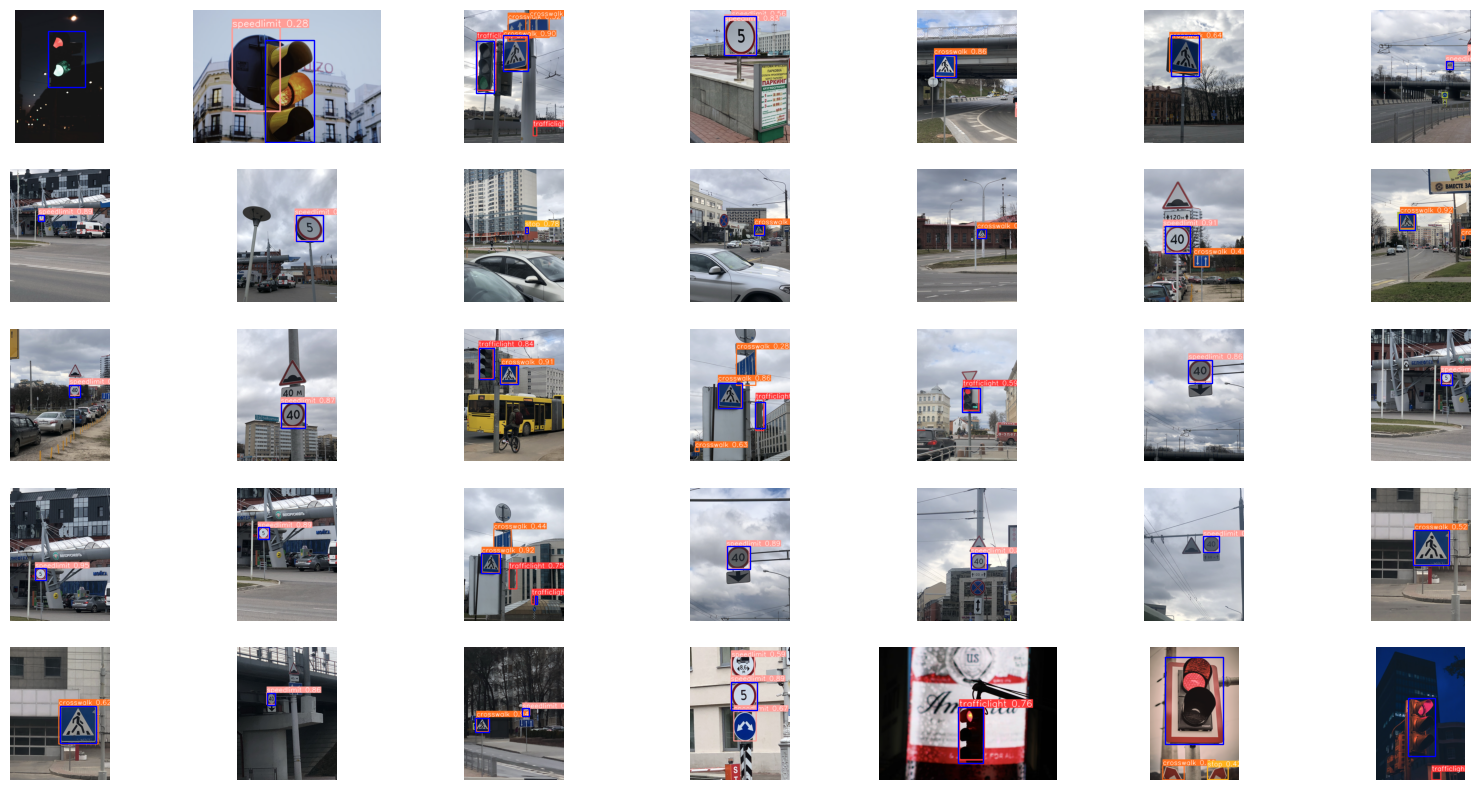

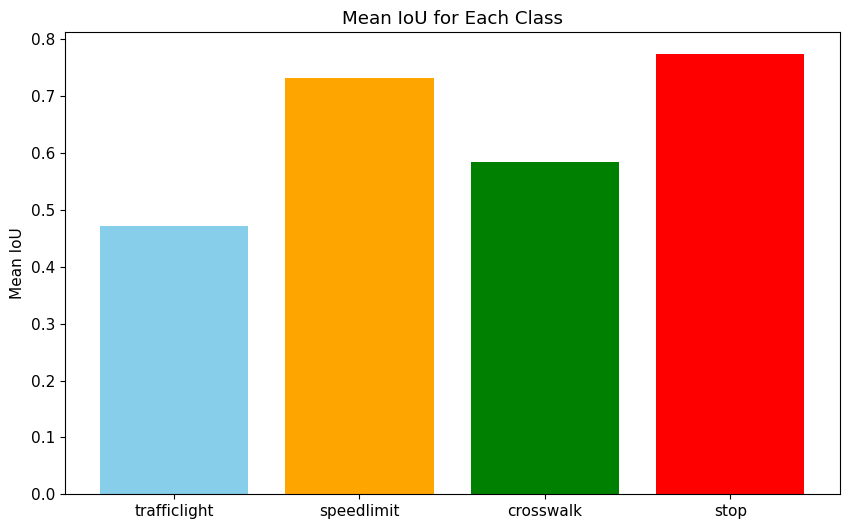

In [51]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import os
from preprocessing import convert_voc_to_yolo
import matplotlib.patches as patches

def calculate_iou(box1, box2):
    x1, y1, w1, h1 = box1
    x2, y2, w2, h2 = box2

    x_intersection = max(x1, x2)
    y_intersection = max(y1, y2)
    w_intersection = min(x1 + w1, x2 + w2) - x_intersection
    h_intersection = min(y1 + h1, y2 + h2) - y_intersection

    intersection_area = max(0, w_intersection) * max(0, h_intersection)
    union_area = w1 * h1 + w2 * h2 - intersection_area

    iou = intersection_area / union_area if union_area > 0 else 0
    return iou

def convert_yolo_to_absolute(size, box):
    img_width, img_height = size
    x, y, w, h = box
    abs_box = [
        (x - w / 2),  # Normalize x-coordinate
        (y - h / 2),  # Normalize y-coordinate
        w,  # Normalize x-coordinate
        h,  # Normalize y-coordinate
    ]
    return abs_box

def convert_yolo_to_absolute1(size, box):
    dw, dh = 1. / size[0], 1. / size[1]
    x, y, w, h = box[0], box[1], box[2], box[3]
    return x * dw, y * dh, w * dw, h * dh

ground_truth_boxes_dict = convert_voc_to_yolo()
class_names = ['trafficlight', 'speedlimit', 'crosswalk', 'stop']

all_iou_values = {cls: [] for cls in class_names}

fig, ax = plt.subplots(5, 7, figsize=(20, 10))

for idx, imgname in enumerate(os.listdir('./data/test')):
    img_path = f'./data/test/{imgname}'
    gt_path = f'./data/testlabels/{imgname.replace(".png", ".txt")}'

    img = cv2.imread(img_path)
    img_bgr = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    results = model(img_bgr)

    img_height, img_width, _ = img_bgr.shape

    gt_boxes = {cls: [] for cls in class_names}
    pred_boxes = {cls: [] for cls in class_names}
    
    gt_box = ground_truth_boxes_dict[imgname.replace(".png", "")]
    for label, bbox in gt_box.items():
        x, y, w, h = bbox
        x = x * img_width
        y = y * img_height
        w = w * img_width
        h = h * img_height

        gt_boxes[label].append([x, y, w, h])
        rect = patches.Rectangle(
            (x, y), w, h, linewidth=1, edgecolor='b', facecolor='none', label=label
        )
        ax[idx // 7, idx % 7].add_patch(rect)

    for det in results.xyxy[0]:
        x_min, y_min, x_max, y_max = det[0:4].cpu().numpy()
        conf = det[4].cpu().numpy()
        cls = int(det[5].cpu().numpy())
        x_center = (x_min + x_max) / 2
        y_center = (y_min + y_max) / 2
        width = x_max - x_min
        height = y_max - y_min
        abs_box = convert_yolo_to_absolute((img_width, img_height),[x_center, y_center, width, height])

        pred_boxes[class_names[cls]].append(abs_box)
        ax[idx // 7, idx % 7].imshow(cv2.cvtColor(np.squeeze(results.render()), cv2.COLOR_RGB2BGR))

    ax[idx // 7, idx % 7].imshow(img_bgr)
    ax[idx // 7, idx % 7].axis('off')

    for cls in class_names:
        iou_values = []
        for pred_box in pred_boxes[cls]:
            for gt_box in gt_boxes[cls]:
                iou = calculate_iou(pred_box, gt_box)
                iou_values.append(iou)
        all_iou_values[cls].append(iou_values)

for cls, iou_values_list in all_iou_values.items():
    flattened_iou_values = [iou for sublist in iou_values_list for iou in sublist]
    print(f'{cls}: {flattened_iou_values}')

flat_iou_values = {cls: [iou for sublist in iou_values for iou in sublist] for cls, iou_values in all_iou_values.items()}

mean_iou_values = {cls: np.mean(iou_values) for cls, iou_values in flat_iou_values.items()}

colors = ['skyblue', 'orange', 'green', 'red']
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(mean_iou_values.keys(), mean_iou_values.values(), color=colors)
ax.set_ylabel('Mean IoU')
ax.set_title('Mean IoU for Each Class')
plt.show()